In [26]:
#use iPython magin notation to make the plots appear inline
%matplotlib inline
#import all needed libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats, integrate, interpolate
import os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.stats import anderson_ksamp
import numpy as np
import math
import statistics
from collections import OrderedDict 
import itertools

In [16]:
# work on original bin-by-sam file (chromothripsis samples)
dosage = "/Users/wendy/Desktop/Lab/bioinfo/pairend/dosage_c3615b_5lib_100kb.txt"
dosage_op = open(dosage)

head = dosage_op.readline()
head = head.split("\n")[0]
hd = head.split("\t")

dosage_dict = {}
for line in dosage_op:
    if line[0] != "C":
        continue
    else:
        line = line.split("\n")[0]
        ln = line.split("\t")
        chrom = ln[0]
        start = int(ln[1])
        end = int(ln[2])
        pop26 = float(ln[11])
        pop28 = float(ln[12])
        pop30 = float(ln[13])
        pop33 = float(ln[14])
        if chrom not in dosage_dict:
            dosage_dict[chrom] = {}
        dosage_dict[chrom][start] = {}
        dosage_dict[chrom][start]["POP26"] = pop26
        dosage_dict[chrom][start]["POP28"] = pop28
        dosage_dict[chrom][start]["POP30"] = pop30
        dosage_dict[chrom][start]["POP33"] = pop33
for g in dosage_dict:
    dosage_dict[g] = OrderedDict(sorted(dosage_dict[g].items()))
        
dosage_op.close()

In [66]:
# separately output sample dosage data
o33 = open("/Users/wendy/Desktop/manuscript/dosage/POP33-31-dosage.txt", "w")
header = "Number\tChrom\tStart\tPOP33"
o33.write(header+"\n")
i = 1
for ch in dosage_dict:
    for pos in dosage_dict[ch]:
        ratio = float(dosage_dict[ch][pos]["POP33"])
        if ratio <=6:
            text = str(i)+"\t"+ch+"\t"+str(pos)+"\t"+str(ratio)
            o33.write(text+"\n")
            i += 1
        large = pos+100000
        if large not in dosage_dict[ch]:
            chmore = ch+"_1"
            for j in range(50):
                o33.write(str(i)+"\t"+chmore+"\t.\t"+str(0)+"\n")
                i += 1
            
o33.close()

In [67]:
# make scatter plots
pop = "/Users/wendy/Desktop/manuscript/dosage/POP33-31-dosage.txt"
pop_op = open(pop)

popfig = {}
for line in pop_op:
    line = line.split("\n")[0]
    ln = line.split("\t")
    if ln[0] == "Number":
        continue
    else:
        if ln[1] not in popfig:
            popfig[ln[1]] = {}
        if "x" not in popfig[ln[1]]:
            popfig[ln[1]]["x"] = []
            popfig[ln[1]]["y"] = []
        popfig[ln[1]]["x"] += [int(ln[0])]
        popfig[ln[1]]["y"] += [float(ln[3])]
        
        
pop_op.close()

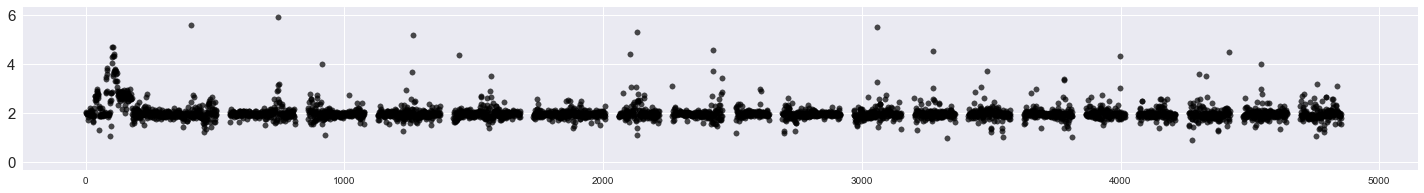

In [68]:
size = itertools.cycle([30,0])
plt.figure(figsize=(25,3))
plt.rc('ytick',labelsize=15)
for chrom in popfig:
    x=popfig[chrom]["x"]
    y=popfig[chrom]["y"]
    plt.scatter(x, y, s=next(size), color="black",alpha=0.7)
plt.savefig('/Users/wendy/Desktop/manuscript/dosage/POP33-31-100kb.png',dpi=300)

In [69]:
# work on original bin-by-sam file (lesion samples)
dosage = "/Users/wendy/Desktop/Lab/lesion-nolesion/lesion-ctrl2732-100kb.txt"
dosage_op = open(dosage)

head = dosage_op.readline()
head = head.split("\n")[0]
hd = head.split("\t")

dosage_dict = {}
for line in dosage_op:
    if line[0] != "C":
        continue
    else:
        line = line.split("\n")[0]
        ln = line.split("\t")
        chrom = ln[0]
        start = int(ln[1])
        end = int(ln[2])
        pop25 = float(ln[8])
        pop26 = float(ln[9])
        pop27 = float(ln[11])
        pop28 = float(ln[12])
        if chrom not in dosage_dict:
            dosage_dict[chrom] = {}
        dosage_dict[chrom][start] = {}
        dosage_dict[chrom][start]["POP25"] = pop25
        dosage_dict[chrom][start]["POP26"] = pop26
        dosage_dict[chrom][start]["POP27"] = pop27
        dosage_dict[chrom][start]["POP28"] = pop28
for g in dosage_dict:
    dosage_dict[g] = OrderedDict(sorted(dosage_dict[g].items()))
        
dosage_op.close()

In [82]:
# separately output sample dosage data
o28 = open("/Users/wendy/Desktop/manuscript/dosage/POP28-86-dosage.txt", "w")
header = "Number\tChrom\tStart\tPOP28"
o28.write(header+"\n")
i = 1
for ch in dosage_dict:
    for pos in dosage_dict[ch]:
        ratio = float(dosage_dict[ch][pos]["POP28"])
        if ratio <=4:
            text = str(i)+"\t"+ch+"\t"+str(pos)+"\t"+str(ratio)
            o28.write(text+"\n")
            i += 1
        large = pos+100000
        if large not in dosage_dict[ch]:
            chmore = ch+"_1"
            for j in range(50):
                o28.write(str(i)+"\t"+chmore+"\t.\t"+str(0)+"\n")
                i += 1
            
o28.close()

In [99]:
# make scatter plots
pop = "/Users/wendy/Desktop/manuscript/dosage/POP25-72-dosage.txt"
pop_op = open(pop)

popfig = {}
for line in pop_op:
    line = line.split("\n")[0]
    ln = line.split("\t")
    if ln[0] == "Number":
        continue
    else:
        if ln[1] not in popfig:
            popfig[ln[1]] = {}
        if "x" not in popfig[ln[1]]:
            popfig[ln[1]]["x"] = []
            popfig[ln[1]]["y"] = []
        popfig[ln[1]]["x"] += [int(ln[0])]
        popfig[ln[1]]["y"] += [float(ln[3])]
        
        
pop_op.close()

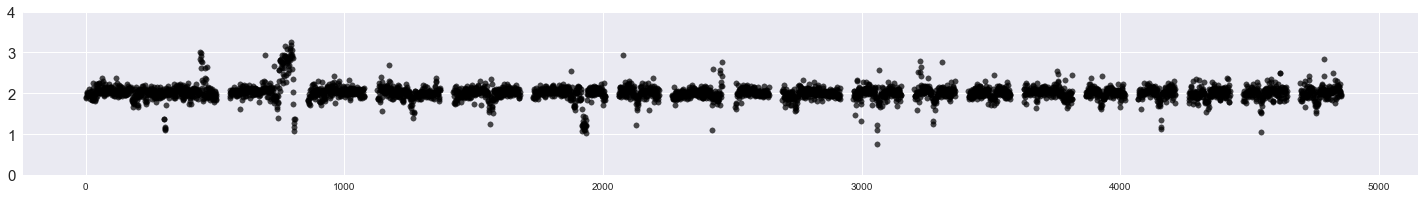

In [100]:
size = itertools.cycle([30,0])
plt.figure(figsize=(25,3))
plt.rc('ytick',labelsize=15)
plt.ylim(top=4,bottom=0)
for chrom in popfig:
    x=popfig[chrom]["x"]
    y=popfig[chrom]["y"]
    plt.scatter(x, y, s=next(size), color="black",alpha=0.7)
plt.savefig('/Users/wendy/Desktop/manuscript/dosage/POP25-72-100kb.png',dpi=300)

In [85]:
# work on original bin-by-sam file (nolesion samples)
dosage = "/Users/wendy/Desktop/Lab/lesion-nolesion/nolesion-nocontrol-100kb-3sample.txt"
dosage_op = open(dosage)

head = dosage_op.readline()
head = head.split("\n")[0]
hd = head.split("\t")

dosage_dict = {}
for line in dosage_op:
    if line[0] != "C":
        continue
    else:
        line = line.split("\n")[0]
        ln = line.split("\t")
        chrom = ln[0]
        start = int(ln[1])
        end = int(ln[2])
        pop2732 = float(ln[6])
        pop2777 = float(ln[7])
        pop3179 = float(ln[8])
        if chrom not in dosage_dict:
            dosage_dict[chrom] = {}
        dosage_dict[chrom][start] = {}
        dosage_dict[chrom][start]["POP2732"] = pop2732
        dosage_dict[chrom][start]["POP2777"] = pop2777
        dosage_dict[chrom][start]["POP3179"] = pop3179
for g in dosage_dict:
    dosage_dict[g] = OrderedDict(sorted(dosage_dict[g].items()))
        
dosage_op.close()

In [104]:
# separately output sample dosage data
o = open("/Users/wendy/Desktop/manuscript/dosage/POP31-79-dosage.txt", "w")
header = "Number\tChrom\tStart\tPOP31_79"
o.write(header+"\n")
i = 1
for ch in dosage_dict:
    for pos in dosage_dict[ch]:
        ratio = float(dosage_dict[ch][pos]["POP3179"])
        if ratio <=4:
            text = str(i)+"\t"+ch+"\t"+str(pos)+"\t"+str(ratio)
            o.write(text+"\n")
            i += 1
        large = pos+100000
        if large not in dosage_dict[ch]:
            chmore = ch+"_1"
            for j in range(50):
                o.write(str(i)+"\t"+chmore+"\t.\t"+str(0)+"\n")
                i += 1
            
o.close()

In [105]:
# make scatter plots
pop = "/Users/wendy/Desktop/manuscript/dosage/POP31-79-dosage.txt"
pop_op = open(pop)

popfig = {}
for line in pop_op:
    line = line.split("\n")[0]
    ln = line.split("\t")
    if ln[0] == "Number":
        continue
    else:
        if ln[1] not in popfig:
            popfig[ln[1]] = {}
        if "x" not in popfig[ln[1]]:
            popfig[ln[1]]["x"] = []
            popfig[ln[1]]["y"] = []
        popfig[ln[1]]["x"] += [int(ln[0])]
        popfig[ln[1]]["y"] += [float(ln[3])]
        
        
pop_op.close()

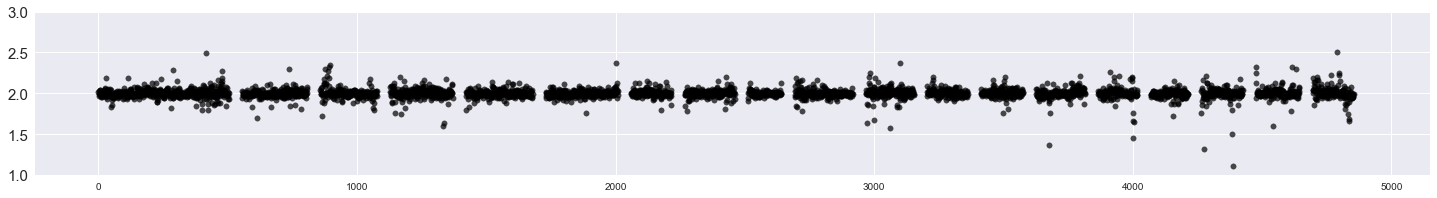

In [106]:
size = itertools.cycle([30,0])
plt.figure(figsize=(25,3))
plt.rc('ytick',labelsize=15)
plt.ylim(top=3,bottom=1)
for chrom in popfig:
    x=popfig[chrom]["x"]
    y=popfig[chrom]["y"]
    plt.scatter(x, y, s=next(size), color="black",alpha=0.7)
plt.savefig('/Users/wendy/Desktop/manuscript/dosage/POP31-79-100kb.png',dpi=300)